# Normality Tests

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms  # Note this is a new addition
import statsmodels.graphics.api as smg

sns.set_style('whitegrid')

In [2]:
norm_sample = stats.norm.rvs(loc=0, scale=1, size=100)
chi2_sample = stats.chi2.rvs(df=5, size=100)
expon_sample = stats.expon.rvs(scale=1,size=100)

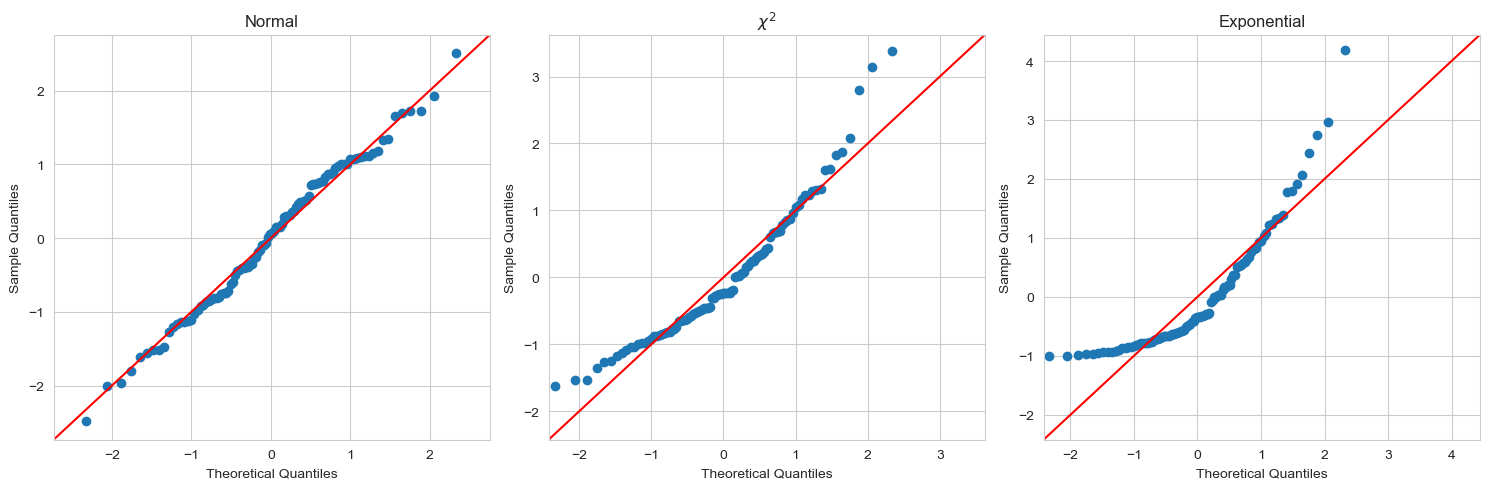

In [4]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sm.qqplot(data=norm_sample, dist=stats.norm, fit=True, line='45', ax=ax1)
sm.qqplot(data=chi2_sample, dist=stats.norm, fit=True, line='45', ax=ax2)
sm.qqplot(data=expon_sample, dist=stats.norm, fit=True, line='45', ax=ax3)
ax1.set_title('Normal')
ax2.set_title('$\chi^2$')
ax3.set_title('Exponential')
fig.tight_layout()

In [17]:
sample = stats.cauchy.rvs(size=20)


In [18]:
stat, pval = stats.shapiro(sample)
print(pval)

6.442464339784237e-09


In [19]:
stat, pval = stats.normaltest(sample)
print(pval)

7.121888732653001e-12


In [20]:
stat, pval = stats.kstest(sample, cdf='norm')
pval

0.09373847931892598

In [21]:
stat, crit_vals, sig_levs = stats.anderson(sample, dist='norm')
print(stat)
print(pd.DataFrame({'Significance':sig_levs, 'Critical Values':crit_vals}))

6.242337476349903
   Significance  Critical Values
0          15.0            0.506
1          10.0            0.577
2           5.0            0.692
3           2.5            0.807
4           1.0            0.960


In [22]:
def plot_normtest_sensitivity(
    dist,
    alpha = 0.1,
    nlist=[10, 25, 50, 75, 100, 250, 500, 1000], 
    bigN=250
):
    shapiro = []
    lilliefors = []
    ks = []
    omnibus = []
    for n in nlist:
        shap = []
        lill = []
        kstemp = []
        omni = []
        for _i in range(bigN):
            sample = dist.rvs(size=n)
            shap.append(stats.shapiro(sample)[1])
            lill.append(sms.lilliefors(sample)[1])
            kstemp.append(stats.kstest(sample, 'norm')[1])
            omni.append(stats.normaltest(sample)[1])
        shapiro.append(sum(np.array(shap) < alpha) / bigN)
        lilliefors.append(sum(np.array(lill) < alpha) / bigN)
        ks.append(sum(np.array(kstemp) < alpha) / bigN)
        omnibus.append(sum(np.array(omni) < alpha) / bigN)
    df = pd.DataFrame({'n':nlist, 'Shapiro':shapiro, 'Lilliefors':lilliefors,
                       'KS':ks, 'Omnibus':omnibus})
    fig, ax = plt.subplots(figsize=(6,3))
    ax.plot('n','Shapiro',data=df)
    ax.plot('n', 'Lilliefors', data=df)
    ax.plot('n','KS',data=df)
    ax.plot('n','Omnibus',data=df)
    ax.legend()
    ax.set_title(f'Varying positive-test rate by Sample Size (alpha={alpha})')
    ax.set_ylabel('Proportion concluding non-normal')
    ax.set_xlabel('Sample Size')
    plt.show()

c:\Users\elder\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


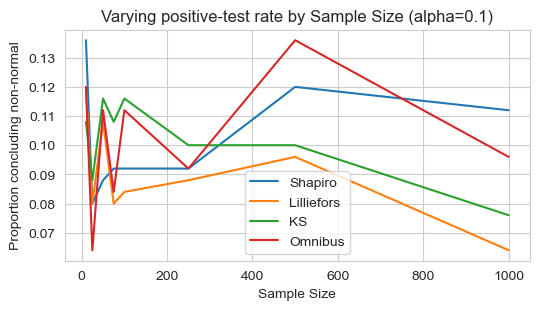

In [23]:
plot_normtest_sensitivity(stats.norm())

c:\Users\elder\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


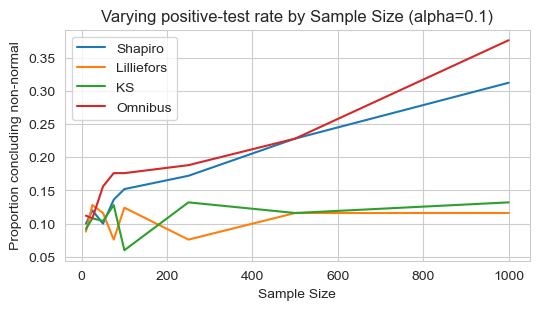

In [24]:
plot_normtest_sensitivity(stats.t(df=29))

c:\Users\elder\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


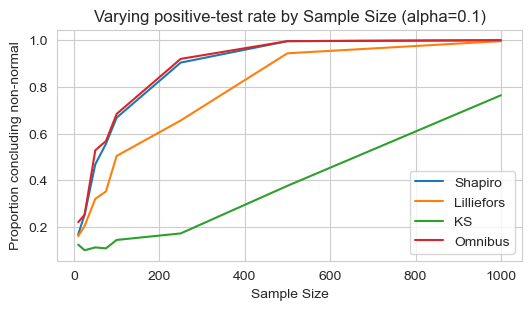

In [25]:
plot_normtest_sensitivity(stats.t(df=5))